In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('TOTAL drc.xlsx')

In [3]:
data

,V0001,V0026,V0031,A005010,A009010,C006,C008,C009,I00102,M01601,...,S082,S083,T004,T005,Y001,Y002,Y003,Y004,H001,VDR001
0,11,1,1,2,1,1,61,1,2,4,...,NaN,NaN,2,NaN,4.0,3.0,NaN,NaN,4.0,NaN
1,11,1,1,1,1,2,57,4,2,6,...,NaN,NaN,2,NaN,3.0,3.0,NaN,NaN,4.0,NaN
2,11,1,1,2,5,2,21,4,1,6,...,NaN,NaN,2,NaN,1.0,1.0,2.0,1.0,1.0,6.0
3,11,1,1,2,1,2,41,2,2,1,...,NaN,NaN,2,NaN,4.0,1.0,3.0,NaN,3.0,NaN
4,11,1,1,2,1,1,51,2,2,6,...,NaN,NaN,2,NaN,4.0,2.0,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,53,1,1,1,1,2,62,4,2,6,...,NaN,NaN,2,NaN,3.0,2.0,NaN,NaN,1.0,NaN
2570,53,1,1,1,1,2,69,4,2,6,...,NaN,NaN,2,NaN,3.0,1.0,3.0,NaN,1.0,NaN
2571,53,1,1,1,6,2,49,4,2,6,...,NaN,NaN,2,NaN,1.0,2.0,NaN,NaN,3.0,NaN
2572,53,1,1,1,1,1,37,4,1,6,...,NaN,NaN,2,NaN,1.0,1.0,3.0,NaN,4.0,NaN


## IDENTIFICANDO VALORES NULOS

In [4]:
porcentagem_null = (data.isna().sum() / data.shape[0])

porcentagem_null_filt = porcentagem_null[porcentagem_null > 0]

data_nulos=(
porcentagem_null_filt.to_frame("% Valores Nulos")
.sort_values("% Valores Nulos", ascending=False)
)


data_nulos.style.format('{:1.2%}', subset=['% Valores Nulos'])

,% Valores Nulos
S083,100.00%
T005,99.42%
S082,97.71%
VDR001,83.14%
P02801,80.26%
Y004,73.54%
P036,64.88%
P038,47.01%
Y003,34.73%
Q03001,5.94%


## EXCLUINDO COLUNAS PELOS VALORES SEREM MAIS DE 50% NULOS

In [5]:
data.drop(columns=['S083','T005','S082','VDR001','P02801','Y004', 'P036', 'P038'], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   V0001    2574 non-null   int64  
 1   V0026    2574 non-null   int64  
 2   V0031    2574 non-null   int64  
 3   A005010  2574 non-null   int64  
 4   A009010  2574 non-null   int64  
 5   C006     2574 non-null   int64  
 6   C008     2574 non-null   int64  
 7   C009     2574 non-null   int64  
 8   I00102   2574 non-null   int64  
 9   M01601   2574 non-null   int64  
 10  N001     2574 non-null   int64  
 11  N004     2460 non-null   float64
 12  IMC      2554 non-null   float64
 13  P02601   2574 non-null   int64  
 14  Bebida   2574 non-null   int64  
 15  P04501   2574 non-null   int64  
 16  P04502   2574 non-null   int64  
 17  FUMA     2574 non-null   int64  
 18  P06701   2574 non-null   int64  
 19  Q00101   2574 non-null   int64  
 20  Q00201   2541 non-null   float64
 21  Q074     2574 

## CONVERTENDO AS COLUNAS PARA INPUTAR OS VALORES EM AUSENTE

In [7]:
colunas_conver = [ 'N004', 'Q00201', 
                          'Q03001', 'Y001','Y002','Y003','H001']
data[colunas_conver] = data[colunas_conver].astype('category')

In [8]:

data['N004'] = data['N004'].astype('string')
data['Q00201'] = data['Q00201'].astype('string')
data['Q03001'] = data['Q03001'].astype('string')
data['Y001'] = data['Y001'].astype('string')
data['Y002'] = data['Y002'].astype('string')
data['Y003'] = data['Y003'].astype('string')
data['H001'] = data['H001'].astype('string')


data.loc[data['N004'] == 0, 'N004'] = '0'
data.loc[data['Q00201'] == 0, 'Q00201'] = '0'
data.loc[data['Q03001'] == 0, 'Q03001'] = '0'
data.loc[data['Y001'] == 0, 'Y001'] = '0'
data.loc[data['Y002'] == 0, 'Y002'] = '0'
data.loc[data['Y003'] == 0, 'Y003'] = '0'
data.loc[data['H001'] == 0, 'H001'] = '0'

In [9]:
data['N004'] = data['N004'].astype('category')
data['Q00201'] = data['Q00201'].astype('category')
data['Q03001'] = data['Q03001'].astype('category')
data['Y001'] = data['Y001'].astype('category')
data['Y002'] = data['Y002'].astype('category')
data['Y003'] = data['Y003'].astype('category')
data['H001'] = data['H001'].astype('category')

In [10]:
porcentagem_nulos = (data.isna().sum() / data.shape[0])

porcentagem_nulos_filtrada = porcentagem_nulos[porcentagem_nulos > 0]

data_nulos=(
porcentagem_nulos_filtrada.to_frame("% Valores Nulos")
.sort_values("% Valores Nulos", ascending=False)
)


data_nulos.style.format('{:1.2%}', subset=['% Valores Nulos'])

,% Valores Nulos
Y003,34.73%
Q03001,5.94%
N004,4.43%
Y002,2.76%
Y001,1.71%
H001,1.71%
Q00201,1.28%
IMC,0.78%


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   V0001    2574 non-null   int64   
 1   V0026    2574 non-null   int64   
 2   V0031    2574 non-null   int64   
 3   A005010  2574 non-null   int64   
 4   A009010  2574 non-null   int64   
 5   C006     2574 non-null   int64   
 6   C008     2574 non-null   int64   
 7   C009     2574 non-null   int64   
 8   I00102   2574 non-null   int64   
 9   M01601   2574 non-null   int64   
 10  N001     2574 non-null   int64   
 11  N004     2460 non-null   category
 12  IMC      2554 non-null   float64 
 13  P02601   2574 non-null   int64   
 14  Bebida   2574 non-null   int64   
 15  P04501   2574 non-null   int64   
 16  P04502   2574 non-null   int64   
 17  FUMA     2574 non-null   int64   
 18  P06701   2574 non-null   int64   
 19  Q00101   2574 non-null   int64   
 20  Q00201   2541 non-null   categ

In [12]:
cols_categoricas = ['Y003', 'Q03001', 'N004','Y002', 'Y001', 'H001'
                     , 'Q00201', 'IMC']

for col in cols_categoricas:
    moda = data[col].mode()[0]
    data[col].fillna(moda, inplace=True)

In [13]:
import math

In [14]:
print("Temos", data.shape[0], "linhas e", data.shape[1], "colunas.")

Temos 2574 linhas e 30 colunas.


## RENOMEANDO AS COLUNAS

In [15]:
data.rename(columns={
    'V0026':'local',
    'V0031':'tipo_cidade',
    'A005010':'abast_agua',
    'A009010':'agua_usada',
    'C008':'Faixa etaria',
    'C006':'sexo',
    'C009':'raca',
    'I00102':'plano_saude',
    'M01601':'freq_exercfis',
    'N001':'av_saude',
    'N004':'desconf_peito',
    'P02601':'consumo_sal',
    'P04501':'horas_tv',
    'P04502':'horas_internet',
    'P06701':'uso_vape',
    'Q074':'asma',
    'Q124':'classe',
    'Q00201':'hipertensao',
    'Q03001':'diabete',
    'Q06306':'infarto',
    'T004':'diag_ist',
    'Y001':'idade_sex_mor',
    'Y002':'relac_sex_12mes',
    'Y003':'freq_uso_camis',
    'H001':'ultima_vez_medico',
    'V0001':'estado'
   
}, inplace=True)

In [16]:
data.drop(columns=['estado'], inplace=True)

## IDENTIFICANDO REDUNDÂNCIAS 

In [17]:
linhas_duplas = data[data.duplicated()]
linhas_duplas

,local,tipo_cidade,abast_agua,agua_usada,sexo,Faixa etaria,raca,plano_saude,freq_exercfis,av_saude,...,hipertensao,asma,classe,diabete,infarto,diag_ist,idade_sex_mor,relac_sex_12mes,freq_uso_camis,ultima_vez_medico


## ENTROPIA EM RELAÇÃO A CLASSE

In [18]:
import numpy as np

classe = 'classe'  
entropia_baseado_na_classe = {}
def calcula_entropia(data):

    counts = data.value_counts().values
    probabilities = counts / len(data)

    entropia = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropia
for column in data.columns:
    if column != classe:
        unique_classes = data[classe].unique()
        total_entropia = 0
        for value in unique_classes:
            subset = data[data[classe] == value][column]
            total_entropia += len(subset) / len(data) * calcula_entropia(subset)
        entropia_baseado_na_classe[column] = total_entropia

print("\nEntropia de cada atributo em relação à classe:")
sorted_entropias = sorted(entropia_baseado_na_classe.items(), key=lambda x: x[1], reverse=True)
for column, entropia in sorted_entropias:
     print(f"{column}: {entropia:.4f}")


Entropia de cada atributo em relação à classe:
IMC: 9.4861
Faixa etaria: 6.0121
horas_tv: 2.4712
horas_internet: 2.3788
ultima_vez_medico: 1.9149
freq_exercfis: 1.8528
av_saude: 1.8170
agua_usada: 1.8006
consumo_sal: 1.6642
raca: 1.4802
abast_agua: 1.4463
Bebida: 1.3774
Q00101: 1.1789
tipo_cidade: 1.1782
freq_uso_camis: 1.1232
relac_sex_12mes: 1.0623
sexo: 0.9941
FUMA: 0.9730
idade_sex_mor: 0.9433
hipertensao: 0.8694
plano_saude: 0.7531
desconf_peito: 0.6582
local: 0.6565
diabete: 0.5407
infarto: 0.4704
asma: 0.3259
uso_vape: 0.0898
diag_ist: 0.0500


## MATRIZ DE CORRELAÇÃO

In [19]:
correlation_matrix = data.corr()

# Imprima a matriz de correlação
print(correlation_matrix)

                      local  tipo_cidade  abast_agua  agua_usada      sexo  \
local              1.000000     0.328723    0.454542   -0.014397 -0.107387   
tipo_cidade        0.328723     1.000000   -0.026007   -0.029308 -0.013872   
abast_agua         0.454542    -0.026007    1.000000    0.068354 -0.060524   
agua_usada        -0.014397    -0.029308    0.068354    1.000000 -0.010625   
sexo              -0.107387    -0.013872   -0.060524   -0.010625  1.000000   
Faixa etaria      -0.037523     0.046563   -0.142041   -0.167008 -0.003748   
raca              -0.012760    -0.136028    0.072288    0.063127  0.015018   
plano_saude        0.177618     0.175344    0.171781    0.120302 -0.050843   
freq_exercfis      0.080761     0.078477    0.020576   -0.015094 -0.021222   
av_saude           0.064144     0.112373   -0.065221   -0.045156  0.048570   
desconf_peito     -0.037168    -0.084129    0.026386    0.027537 -0.099042   
IMC               -0.062582     0.006929   -0.075891    0.005661

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   local              2574 non-null   int64   
 1   tipo_cidade        2574 non-null   int64   
 2   abast_agua         2574 non-null   int64   
 3   agua_usada         2574 non-null   int64   
 4   sexo               2574 non-null   int64   
 5   Faixa etaria       2574 non-null   int64   
 6   raca               2574 non-null   int64   
 7   plano_saude        2574 non-null   int64   
 8   freq_exercfis      2574 non-null   int64   
 9   av_saude           2574 non-null   int64   
 10  desconf_peito      2574 non-null   category
 11  IMC                2574 non-null   float64 
 12  consumo_sal        2574 non-null   int64   
 13  Bebida             2574 non-null   int64   
 14  horas_tv           2574 non-null   int64   
 15  horas_internet     2574 non-null   int64   
 16  FUMA  

In [21]:
data['Faixa etaria'].value_counts()

Faixa etaria
55    63
49    61
58    60
61    57
36    56
      ..
94     3
92     3
93     3
91     1
95     1
Name: count, Length: 81, dtype: int64

In [22]:
import pandas as pd
import os
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import LabelEncoder

In [ ]:
## CODIFICANDO OS RESPECTIVOS ATRIBUTOS

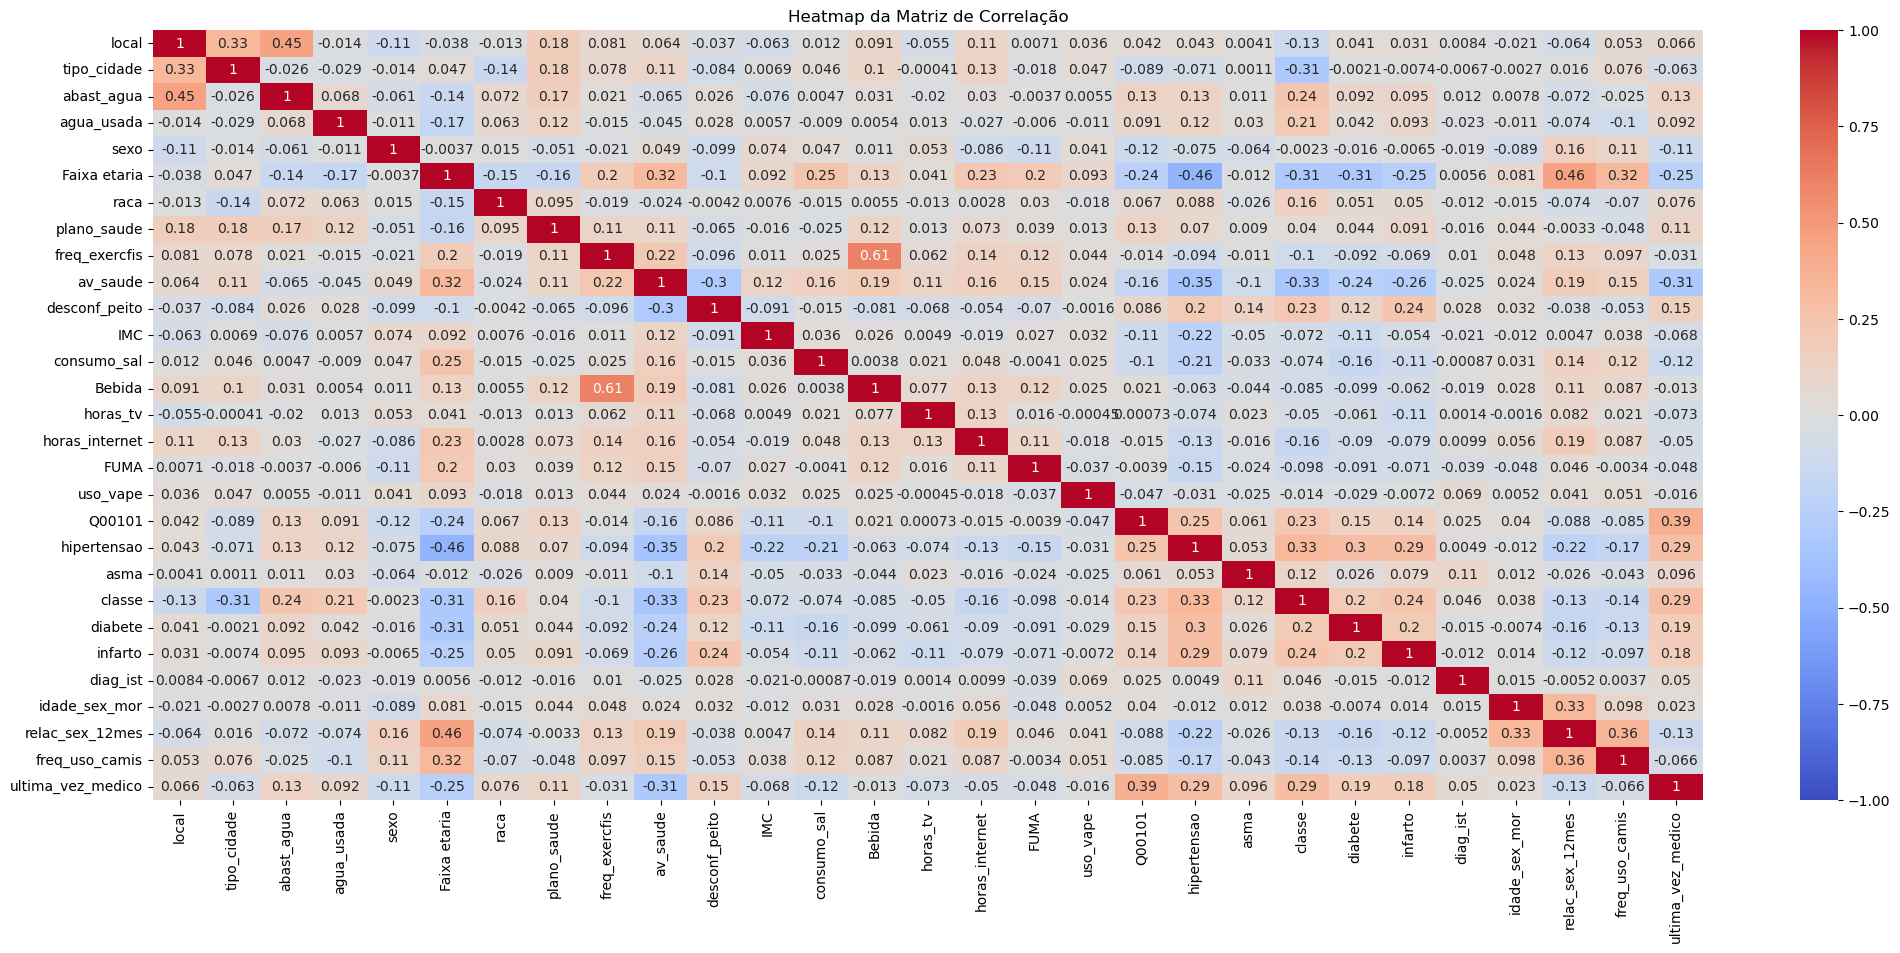

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie um heatmap para a matriz de correlação
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap da Matriz de Correlação')
plt.savefig('HeatMap')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = data.drop('classe', axis=1)
y = data['classe']

# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)

# Apply the undersampler to the training data
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

## GERAÇAO DOS MODELOS

In [28]:
y_test.value_counts()

classe
1    260
2    255
Name: count, dtype: int64

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores Parâmetros: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy'}
Acurácia: 0.7087
Precisão: 0.7132
Revocação: 0.7077
F1-Score: 0.7104
ROC AUC: 0.7087

Matriz de Confusão:
[[184  76]
 [ 74 181]]


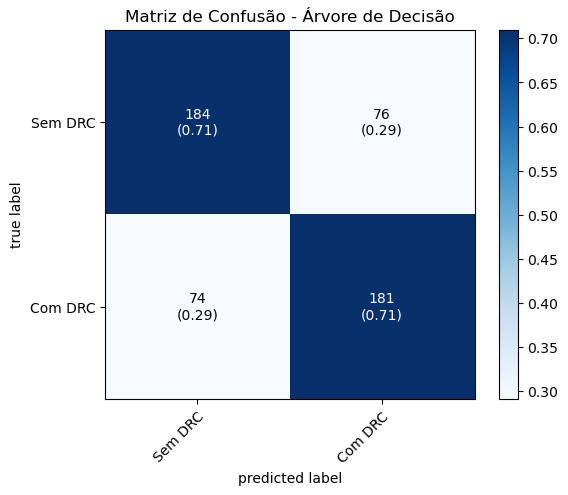

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.71      0.71      0.71       260
           2       0.70      0.71      0.71       255

    accuracy                           0.71       515
   macro avg       0.71      0.71      0.71       515
weighted avg       0.71      0.71      0.71       515



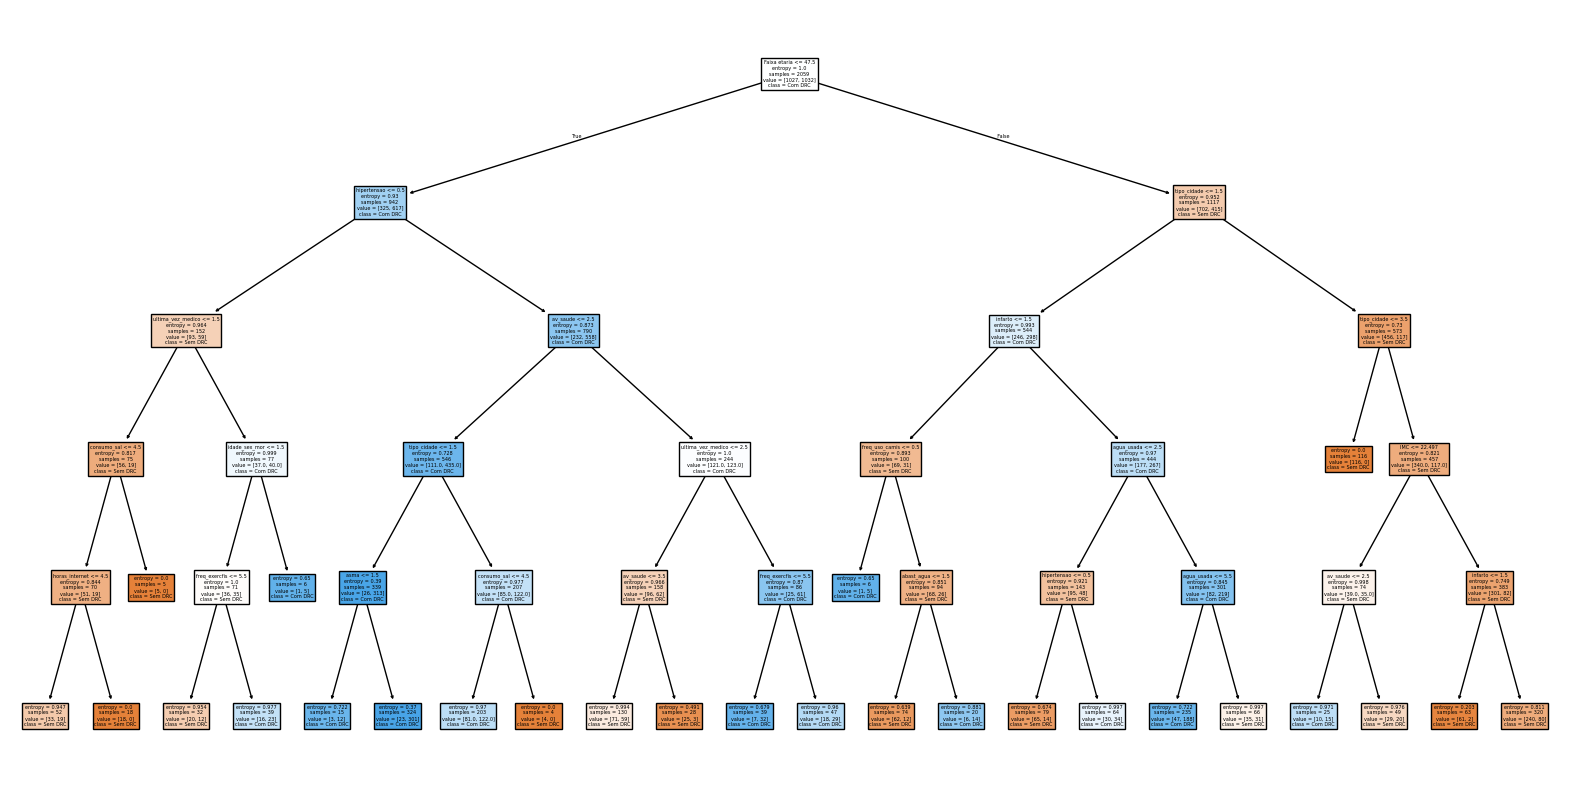

Matriz de Confusão:
[[184  76]
 [ 74 181]]


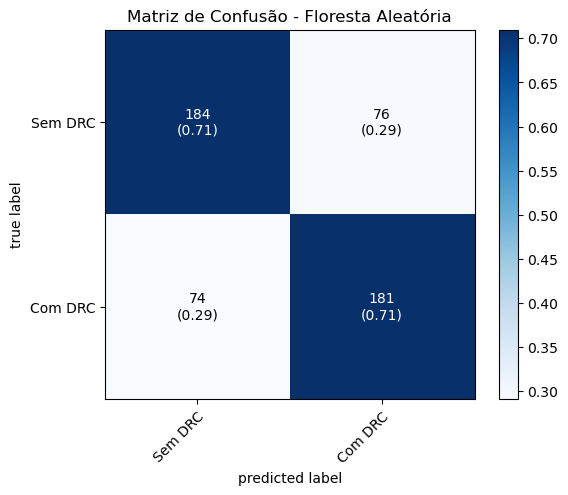

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.71      0.71      0.71       260
           2       0.70      0.71      0.71       255

    accuracy                           0.71       515
   macro avg       0.71      0.71      0.71       515
weighted avg       0.71      0.71      0.71       515



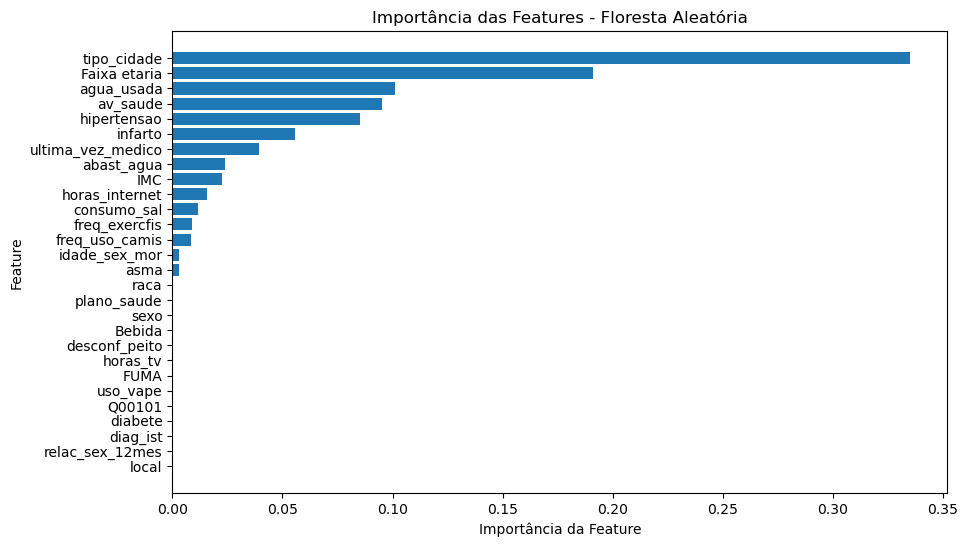

In [29]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
import matplotlib
# Definição dos parâmetros para otimização
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



# Otimização de parâmetros com RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=params,
    n_iter=10,  # número de combinações de hiperparâmetros a serem tentadas
    scoring='accuracy',  # métrica de avaliação
    n_jobs=-1,  # usar todos os núcleos do processador
    cv=cv,  # estratégia de validação cruzada
    verbose=1,  # mostrar mensagens de progresso
    random_state=42
)
random_search.fit(X_train, y_train)

# Obtenção do melhor modelo
best_model = random_search.best_estimator_

# Predição com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Impressão dos resultados
print(f"Melhores Parâmetros: {random_search.best_params_}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}\n")

# Impressão da matriz de confusão
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem DRC', 'Com DRC'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

# Impressão do relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Exibição da árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['Sem DRC', 'Com DRC'], filled=True)
plt.show()

# Impressão da matriz de confusão
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem DRC', 'Com DRC'])
plt.title('Matriz de Confusão - Floresta Aleatória')
plt.show()

# Impressão do relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Impressão das features mais importantes
feature_importances = best_model.feature_importances_
sorted_indices = feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel('Importância da Feature')
plt.ylabel('Feature')
plt.title('Importância das Features - Floresta Aleatória')
plt.savefig('FeaturesImportance')
plt.show()

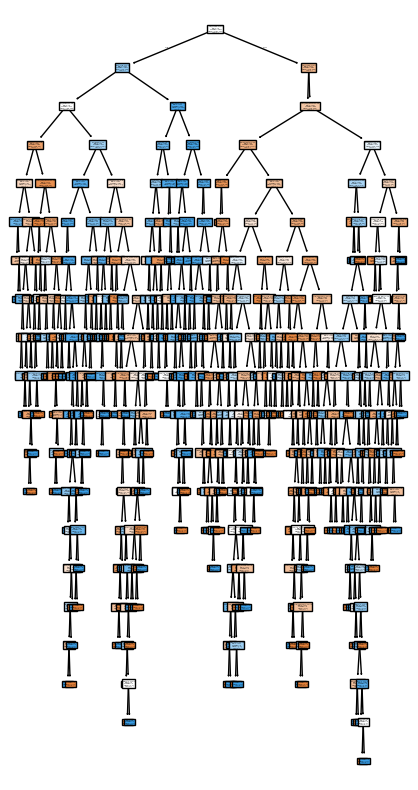

In [30]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)



plt.figure(figsize=(5,10))
plot_tree(clf, filled=True, feature_names=X.columns,class_names=[str(c) for c in clf.classes_])
plt.show()

In [31]:
tree_ = best_model.tree_

# Definir a função para extrair as regras
def get_tree_rules(tree_, feature_names):
    tree_rules = []

    def traverse_tree(node, rules=[]):
        if tree_.feature[node] != -2:
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            if tree_.children_left[node] != -1:
                traverse_tree(tree_.children_left[node], rules + [f'{name} <= {threshold}'])
            if tree_.children_right[node] != -1:
                traverse_tree(tree_.children_right[node], rules + [f'{name} > {threshold}'])
        else:
            tree_rules.append((tree_.value[node], rules))

    traverse_tree(0)
    return tree_rules

# Extrair as regras da árvore treinada
tree_rules = get_tree_rules(tree_, X_train.columns)

# Imprimir as regras
for rule in tree_rules:
    value, conditions = rule
    print(f"Regra: {' and '.join(conditions)}")
    print(f"Predição: {value}")

Regra: Faixa etaria <= 47.5 and hipertensao <= 0.5 and ultima_vez_medico <= 1.5 and consumo_sal <= 4.5 and horas_internet <= 4.5
Predição: [[0.63461538 0.36538462]]
Regra: Faixa etaria <= 47.5 and hipertensao <= 0.5 and ultima_vez_medico <= 1.5 and consumo_sal <= 4.5 and horas_internet > 4.5
Predição: [[1. 0.]]
Regra: Faixa etaria <= 47.5 and hipertensao <= 0.5 and ultima_vez_medico <= 1.5 and consumo_sal > 4.5
Predição: [[1. 0.]]
Regra: Faixa etaria <= 47.5 and hipertensao <= 0.5 and ultima_vez_medico > 1.5 and idade_sex_mor <= 1.5 and freq_exercfis <= 5.5
Predição: [[0.625 0.375]]
Regra: Faixa etaria <= 47.5 and hipertensao <= 0.5 and ultima_vez_medico > 1.5 and idade_sex_mor <= 1.5 and freq_exercfis > 5.5
Predição: [[0.41025641 0.58974359]]
Regra: Faixa etaria <= 47.5 and hipertensao <= 0.5 and ultima_vez_medico > 1.5 and idade_sex_mor > 1.5
Predição: [[0.16666667 0.83333333]]
Regra: Faixa etaria <= 47.5 and hipertensao > 0.5 and av_saude <= 2.5 and tipo_cidade <= 1.5 and asma <= 1.

## Floresta Aleatória ##


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_co

Melhores Parâmetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}
Acurácia: 0.8194
Precisão: 0.8151
Revocação: 0.8308
F1-Score: 0.8229
ROC AUC: 0.8193

Matriz de Confusão:
[[216  44]
 [ 49 206]]


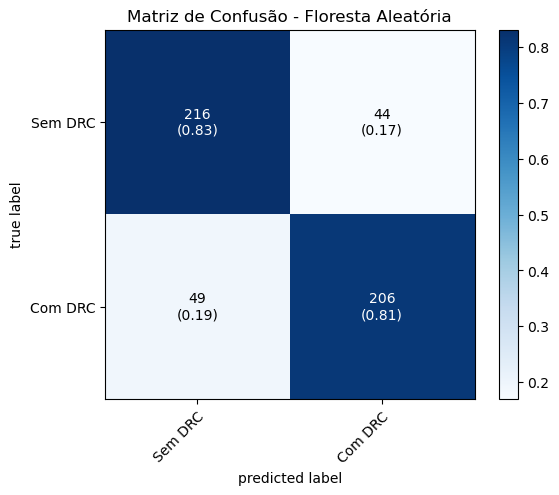

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.83      0.82       260
           2       0.82      0.81      0.82       255

    accuracy                           0.82       515
   macro avg       0.82      0.82      0.82       515
weighted avg       0.82      0.82      0.82       515



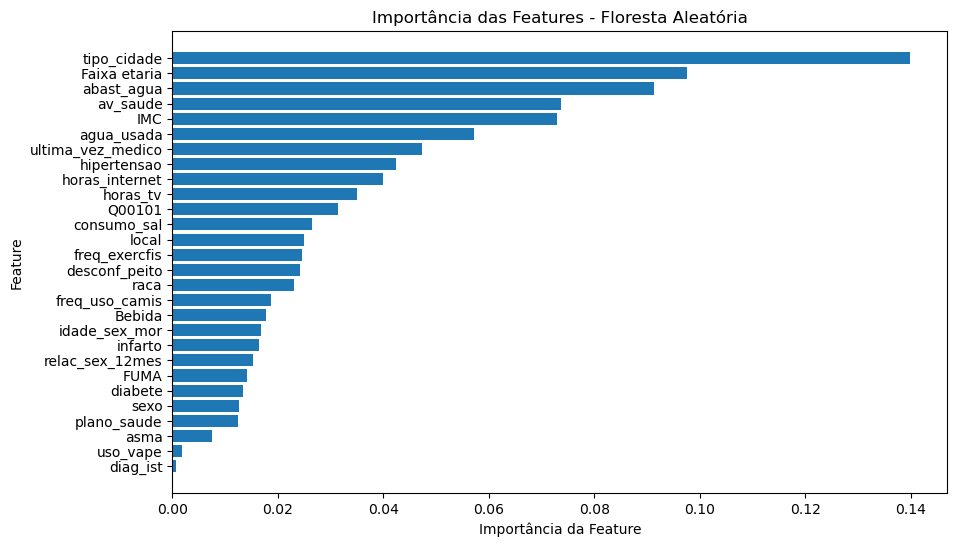

In [32]:
print("## Floresta Aleatória ##")


params = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(RandomForestClassifier(), params, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# Obtenção do melhor modelo
best_model = random_search.best_estimator_

# Predição com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Impressão dos resultados
print(f"Melhores Parâmetros: {random_search.best_params_}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}\n")

# Impressão da matriz de confusão
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem DRC', 'Com DRC'])
plt.title('Matriz de Confusão - Floresta Aleatória')
plt.show()

# Impressão do relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Impressão das features mais importantes
feature_importances = best_model.feature_importances_
sorted_indices = feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel('Importância da Feature')
plt.ylabel('Feature')
plt.title('Importância das Features - Floresta Aleatória')
plt.savefig('FeatureImportance_RANDOM')
plt.show()

## Naive Bayes ##
Acurácia: 0.7573
Precisão: 0.8000
Revocação: 0.6923
F1-Score: 0.7423
ROC AUC: 0.7579

Matriz de Confusão:
[[180  80]
 [ 45 210]]


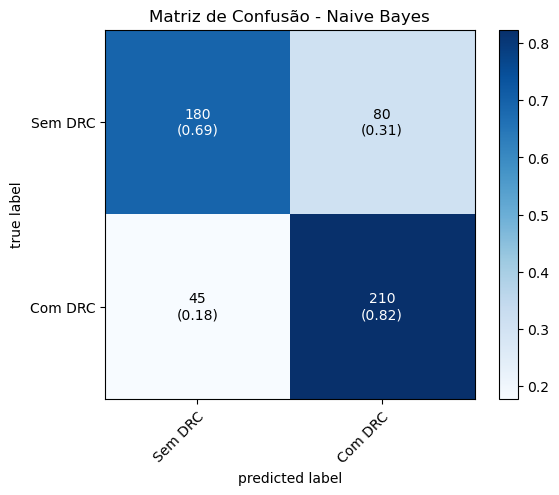

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.80      0.69      0.74       260
           2       0.72      0.82      0.77       255

    accuracy                           0.76       515
   macro avg       0.76      0.76      0.76       515
weighted avg       0.76      0.76      0.76       515



In [33]:
print("## Naive Bayes ##")

# Criação do modelo
model = GaussianNB()

# Treinamento do modelo
model.fit(X_train, y_train)

# Predição com o modelo
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Impressão dos resultados
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}\n")

# Impressão da matriz de confusão
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem DRC', 'Com DRC'])
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()

# Impressão do relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

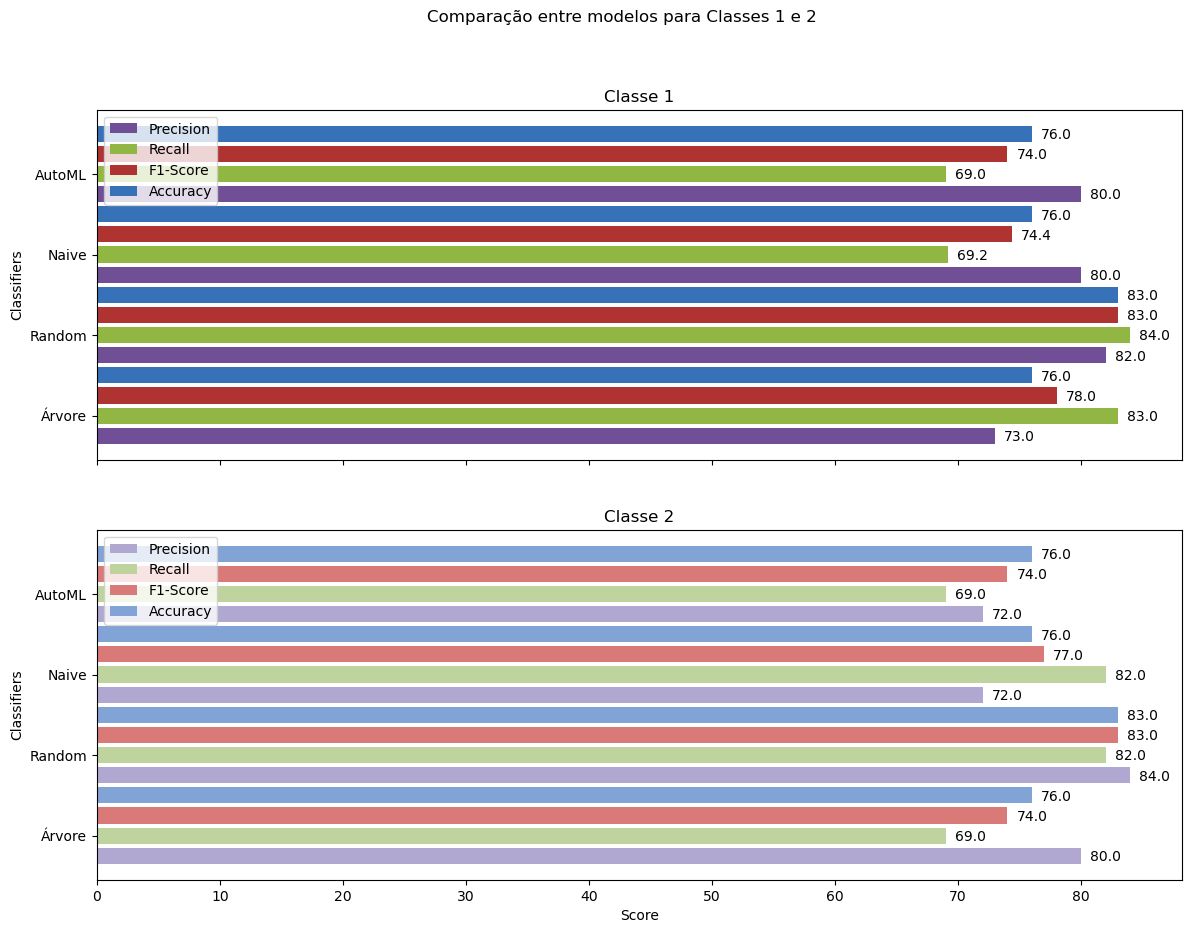

In [34]:
def autolabel(rects, ax):
    for rect in rects:
        width = rect.get_width()
        height = rect.get_height()
        ypos = rect.get_y() + height / 2
        ax.text(width + 2.0, ypos - 0.1, f'{width:.1f}', ha='center', va='bottom', rotation=0, fontsize=10)

# Valores dos agrupamentos para classe 1
Precision_1 = [73.0, 82.0, 80.0, 80.0]
Recall_1 = [83.0, 84.0, 69.2, 69.0]
F1Score_1 = [78.0, 83.0, 74.4, 74.0]
Accuracy_1 = [76.0, 83.0, 76.0, 76.0]

# Valores dos agrupamentos para classe 2
Precision_2 = [80.0, 84.0, 72.0, 72.0]
Recall_2 = [69.0, 82.0, 82.0, 69.0]
F1Score_2 = [74.0, 83.0, 77.0, 74.0]
Accuracy_2 = [76.0, 83.0, 76.0, 76.0]

# Definindo o numero de colunas e o numero de agrupamentos
number_columns = len(Precision_1)
number_groups = 4

# Definindo a largura das barras
barWidth = 0.2

# Espaçamento entre barras
espacamentoEntreBarras = 0.05

# Espaçamento de um grupo no outro
espacamentoEntreGrupos = 2.0

# Aumentando o gráfico
plt.rcParams['figure.figsize'] = (14, 10)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Definindo a posição das barras para classe 1
r1 = np.arange(number_columns)
r2 = [x + barWidth + espacamentoEntreBarras for x in r1]
r3 = [x + barWidth + espacamentoEntreBarras for x in r2]
r4 = [x + barWidth + espacamentoEntreBarras for x in r3]

# Criando as barras para classe 1
label1 = ax1.barh(r1, Precision_1, barWidth, color='#704F97', label='Precision')
label2 = ax1.barh(r2, Recall_1, barWidth, color='#91B643', label='Recall')
label3 = ax1.barh(r3, F1Score_1, barWidth, color='#AF3330', label='F1-Score')
label4 = ax1.barh(r4, Accuracy_1, barWidth, color='#3771B8', label='Accuracy')

# Adicionando legendas nas barras para classe 1
ax1.set_ylabel('Classifiers')
ax1.set_yticks([r + barWidth + espacamentoEntreBarras for r in r1])
ax1.set_yticklabels(['Árvore', 'Random', 'Naive', 'AutoML'])
ax1.set_title('Classe 1')
autolabel(label1, ax1)
autolabel(label2, ax1)
autolabel(label3, ax1)
autolabel(label4, ax1)
ax1.legend(loc='upper left')

# Definindo a posição das barras para classe 2
r1_2 = np.arange(number_columns)
r2_2 = [x + barWidth + espacamentoEntreBarras for x in r1_2]
r3_2 = [x + barWidth + espacamentoEntreBarras for x in r2_2]
r4_2 = [x + barWidth + espacamentoEntreBarras for x in r3_2]

# Criando as barras para classe 2
label1_2 = ax2.barh(r1_2, Precision_2, barWidth, color='#B0A8D1', label='Precision')
label2_2 = ax2.barh(r2_2, Recall_2, barWidth, color='#BFD39F', label='Recall')
label3_2 = ax2.barh(r3_2, F1Score_2, barWidth, color='#D97A78', label='F1-Score')
label4_2 = ax2.barh(r4_2, Accuracy_2, barWidth, color='#82A3D5', label='Accuracy')

# Adicionando legendas nas barras para classe 2
ax2.set_xlabel('Score')
ax2.set_ylabel('Classifiers')
ax2.set_yticks([r + barWidth + espacamentoEntreBarras for r in r1_2])
ax2.set_yticklabels(['Árvore', 'Random', 'Naive', 'AutoML'])
ax2.set_title('Classe 2')
autolabel(label1_2, ax2)
autolabel(label2_2, ax2)
autolabel(label3_2, ax2)
autolabel(label4_2, ax2)
ax2.legend(loc='upper left')
plt.savefig('Compa.png')
plt.suptitle('Comparação entre modelos para Classes 1 e 2')
plt.show()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML

# Criar o modelo AutoML
automl = AutoML(mode='Explain', total_time_limit=3600)

# Treinar o modelo
automl.fit(X_train, y_train)

# Previsões
predictions = automl.predict(X_test)

# Avaliar o modelo
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)

AutoML directory: AutoML_22
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.693146 trained in 0.47 seconds


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight


2_DecisionTree logloss 0.514422 trained in 43.95 seconds


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


3_Linear logloss 0.506409 trained in 8.49 seconds
* Step default_algorithms will try to check up to 3 models


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


4_Default_Xgboost logloss 0.42462 trained in 10.34 seconds
5_Default_NeuralNetwork logloss 0.719288 trained in 4.46 seconds


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


6_Default_RandomForest logloss 0.44861 trained in 7.1 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.419716 trained in 4.52 seconds
AutoML fit time: 96.86 seconds
AutoML best model: Ensemble
Accuracy: 0.8252427184466019


In [36]:
# Verificar se o modelo tem um atributo 'estimators_' que lista os modelos base
if hasattr(automl, 'estimators_'):
    # Obter a lista de estimadores no ensemble
    estimators = automl.estimators_

    # Imprimir os tipos de cada estimador na lista
    for estimator in estimators:
        print(type(estimator))
else:
    print("O modelo ensemble não tem atributo 'estimators_' para listar os modelos base.")

O modelo ensemble não tem atributo 'estimators_' para listar os modelos base.


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from supervised.automl import AutoML
from scipy.stats import ttest_ind

# Supondo que 'data' é o seu DataFrame e 'target' é a coluna alvo
# Certifique-se de que 'data' já está carregado e pré-processado

# Treinar e obter acurácias dos modelos usando validação cruzada

# Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy')

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

# Naive Bayes
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=10, scoring='accuracy')



# Calcular o teste t para comparar os modelos

# Árvore de Decisão vs Random Forest
t_statistic_dt_rf, p_value_dt_rf = ttest_ind(dt_scores, rf_scores)
print(f"Decision Tree vs Random Forest: t-statistic = {t_statistic_dt_rf}, p-value = {p_value_dt_rf}")

# Árvore de Decisão vs Naive Bayes
t_statistic_dt_nb, p_value_dt_nb = ttest_ind(dt_scores, nb_scores)
print(f"Decision Tree vs Naive Bayes: t-statistic = {t_statistic_dt_nb}, p-value = {p_value_dt_nb}")

# Random Forest vs Naive Bayes
t_statistic_rf_nb, p_value_rf_nb = ttest_ind(rf_scores, nb_scores)
print(f"Random Forest vs Naive Bayes: t-statistic = {t_statistic_rf_nb}, p-value = {p_value_rf_nb}")



Decision Tree vs Random Forest: t-statistic = -6.747430081042014, p-value = 2.530239231165364e-06
Decision Tree vs Naive Bayes: t-statistic = 0.8721611622141846, p-value = 0.3946057095751657
Random Forest vs Naive Bayes: t-statistic = 8.836419307319694, p-value = 5.782282274354677e-08


In [38]:
from sklearn.model_selection import cross_val_score

# Validação cruzada
cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')

# Resultados da validação cruzada
print("Scores da Validação Cruzada:", cv_scores)
print("Média da Validação Cruzada:", np.mean(cv_scores))
print("Desvio Padrão da Validação Cruzada:", np.std(cv_scores))

Scores da Validação Cruzada: [0.73255814 0.77906977 0.8875969  0.84883721 0.89105058 0.91050584
 0.90272374 0.6692607  0.56420233 0.48249027]
Média da Validação Cruzada: 0.7668295478538896
Desvio Padrão da Validação Cruzada: 0.14443047638928647


In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib



# Treinando o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obter a importância das características
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Ordenar pela importância
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plotar a importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importância das Características')
plt.show()

C:\Users\Y044771\AppData\Local\Temp\ipykernel_8520\2047532363.py:26: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [40]:
from supervised.automl import AutoML

automl = AutoML(mode='Explain', total_time_limit=3600)
automl.fit(X_train, y_train)

# Impressão da matriz de confusão
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem DRC', 'Com DRC'])
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()

# Impressão do relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

AutoML directory: AutoML_23
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.693146 trained in 0.83 seconds


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight


2_DecisionTree logloss 0.514422 trained in 5.7 seconds


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


3_Linear logloss 0.506409 trained in 9.27 seconds
* Step default_algorithms will try to check up to 3 models


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


4_Default_Xgboost logloss 0.42462 trained in 11.11 seconds
5_Default_NeuralNetwork logloss 0.719288 trained in 5.05 seconds


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


6_Default_RandomForest logloss 0.44861 trained in 7.65 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.419716 trained in 3.35 seconds
AutoML fit time: 59.4 seconds
AutoML best model: Ensemble
Matriz de Confusão:
[[180  80]
 [ 45 210]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.80      0.69      0.74       260
           2       0.72      0.82      0.77       255

    accuracy                           0.76       515
   macro avg       0.76      0.76      0.76       515
weighted avg       0.76      0.76      0.76       515



C:\Users\Y044771\AppData\Local\Temp\ipykernel_8520\2000714390.py:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [41]:
from supervised.automl import AutoML

# Inicialize o AutoML
automl = AutoML(mode='Explain', total_time_limit=3600)

# Treine o modelo
automl.fit(X_train, y_train)

# Verifique se há um atributo 'models'
if hasattr(automl, 'models'):
    models = automl.models
    print("Ensemble models:")
    for model_info in models:
        model_name = model_info['name']
        print(model_name)
else:
    print("Could not find ensemble models information.")

AutoML directory: AutoML_24
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.693146 trained in 0.83 seconds


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight


2_DecisionTree logloss 0.514422 trained in 5.98 seconds


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


3_Linear logloss 0.506409 trained in 9.05 seconds
* Step default_algorithms will try to check up to 3 models


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


4_Default_Xgboost logloss 0.42462 trained in 9.29 seconds
5_Default_NeuralNetwork logloss 0.719288 trained in 4.47 seconds


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight
C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


6_Default_RandomForest logloss 0.44861 trained in 6.88 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.419716 trained in 3.8 seconds
AutoML fit time: 55.82 seconds
AutoML best model: Ensemble
Could not find ensemble models information.
